In [1]:
from model.twitter_pipeline import lgbm_model
import pandas
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix

SEED=12

C:\Anaconda3\envs\nlp\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Anaconda3\envs\nlp\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Anaconda3\envs\nlp\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [2]:
data = pandas.read_csv('data/training.1600000.processed.noemoticon.csv', encoding='latin-1',header=None)
X = data[5]
y = data[0].map(lambda x: 1 if x==4 else 0)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)

y_score_train = lgbm_model.predict_proba(X_train)[:,1]
y_score_test = lgbm_model.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute micro-average ROC curve and ROC area
fpr["train"], tpr["train"], _ = roc_curve(y_train.ravel(), y_score_train.ravel())
roc_auc["train"] = auc(fpr["train"], tpr["train"])
fpr["test"], tpr["test"], _ = roc_curve(y_test.ravel(), y_score_test.ravel())
roc_auc["test"] = auc(fpr["test"], tpr["test"])

## Plot ROC Curve

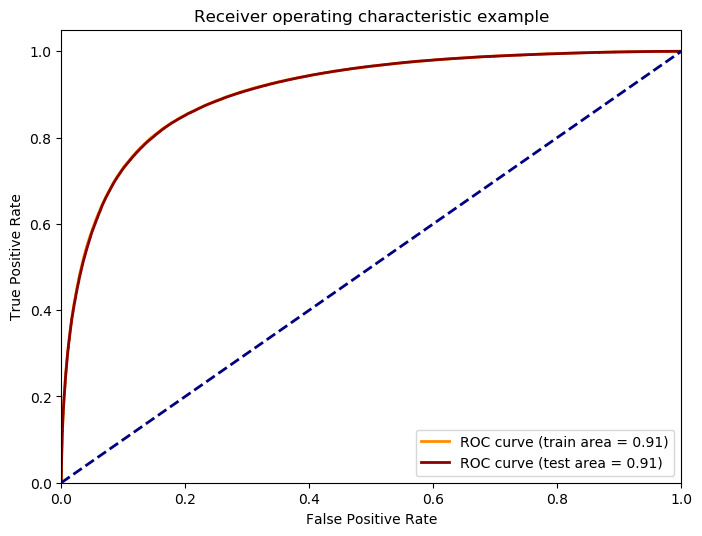

In [3]:
plt.figure(figsize=(8, 6), dpi=100)

lw = 2
plt.plot(fpr['train'], tpr['train'], color='darkorange',
         lw=lw, label='ROC curve (train area = %0.2f)' % roc_auc['train'])
plt.plot(fpr['test'], tpr['test'], color='darkred',
         lw=lw, label='ROC curve (test area = %0.2f)' % roc_auc['test'])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [4]:
y_pred_train = lgbm_model.predict(X_train)
confusion_matrix(y_train, y_pred_train)

array([[482611, 116813],
       [ 90903, 509673]], dtype=int64)

In [5]:
y_pred_test = lgbm_model.predict(X_test)
confusion_matrix(y_test, y_pred_test)

array([[161262,  39314],
       [ 30205, 169219]], dtype=int64)